## Importing the libraries

In [45]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [6]:
X=dataset.drop(columns=['Purchased','Gender','User ID'])
y=dataset['Purchased']

In [7]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [10]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [11]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [48]:
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [49]:
y_pred = lr_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [50]:
result_df=pd.DataFrame(data=y_pred,columns=['Predict_Purchased'])
df_x = pd.DataFrame(data=X_test.values,columns=['Age','EstimatedSalary'])
df_y = pd.DataFrame(data=y_test.values,columns=['Actual_Purchased'])
result_df = pd.concat([df_x,df_y,result_df],axis=1)
result_df

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
0,30,87000,0,0
1,38,50000,0,0
2,35,75000,0,0
3,30,79000,0,0
4,35,50000,0,0
...,...,...,...,...
95,27,96000,1,0
96,23,63000,0,0
97,48,33000,1,0
98,48,90000,1,0


In [51]:
(result_df['Actual_Purchased'] == result_df['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [52]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[68  0]
 [32  0]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



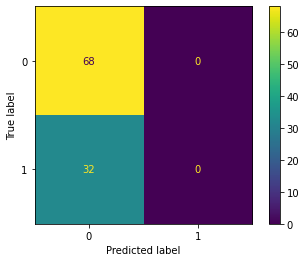

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_model.classes_)
disp.plot()
plt.show()


## Use StandardScaler() to improved performance and re-train your model

In [56]:
scaller=StandardScaler()
X_new=scaller.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [59]:
print(lr_model.predict([[30,90000]]))

[1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [60]:
print(lr_model.predict([[40,90000]]))

[1]
